In [19]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
import datetime as dt
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
import yfinance as yf

In [39]:
tesla = pd.read_csv('C:/Users/Josica/Documents/ML/Project/stock_data.csv')
tesla

,Date,Open,High,Low,Close,Volume
0,29-01-2013,2.540000,2.562667,2.475333,2.530000,21399000
1,30-01-2013,2.523333,2.533333,2.495333,2.501333,14521500
2,31-01-2013,2.524667,2.524667,2.462000,2.500667,13521000
3,01-02-2013,2.544667,2.566667,2.508000,2.553333,16509000
4,04-02-2013,2.560000,2.561333,2.506000,2.516000,16920000
...,...,...,...,...,...,...
2561,31-03-2023,197.529999,207.789993,197.199997,207.460007,169638500
2562,03-04-2023,199.910004,202.690002,192.199997,194.770004,169545900
2563,04-04-2023,197.320007,198.740005,190.320007,192.580002,126463800
2564,05-04-2023,190.520004,190.679993,183.759995,185.520004,133882500


In [40]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2566 non-null   object 
 1   Open    2566 non-null   float64
 2   High    2566 non-null   float64
 3   Low     2566 non-null   float64
 4   Close   2566 non-null   float64
 5   Volume  2566 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 120.4+ KB


In [41]:
tesla.head()

,Date,Open,High,Low,Close,Volume
0,29-01-2013,2.540000,2.562667,2.475333,2.530000,21399000
1,30-01-2013,2.523333,2.533333,2.495333,2.501333,14521500
2,31-01-2013,2.524667,2.524667,2.462000,2.500667,13521000
3,01-02-2013,2.544667,2.566667,2.508000,2.553333,16509000
4,04-02-2013,2.560000,2.561333,2.506000,2.516000,16920000


In [42]:
tesla['Date'] = pd.to_datetime(tesla['Date'],dayfirst=True)
tesla['Date'] = tesla['Date'].map(dt.datetime.toordinal)

In [43]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 734897 738616


AttributeError: 'numpy.int64' object has no attribute 'days'

In [44]:
tesla.describe()

,Date,Open,High,Low,Close,Volume
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03
mean,736755.782151,76.271227,77.999208,74.379733,76.228911,1.142900e+08
std,1074.768460,102.354803,104.724943,99.688868,102.231150,8.043563e+07
min,734897.000000,2.294000,2.330667,2.253333,2.292000,6.603000e+06
25%,735824.750000,14.677334,14.892334,14.443500,14.642666,6.429195e+07
50%,736756.500000,19.705667,20.046667,19.269333,19.654667,9.100725e+07
75%,737685.750000,127.190834,133.124172,123.604834,127.074165,1.356581e+08
max,738616.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08


<Axes: >

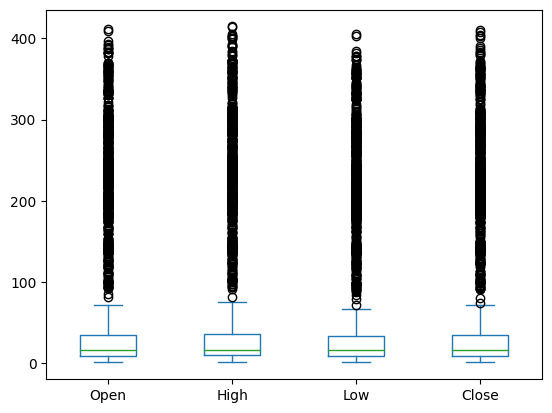

In [35]:
tesla[['Open','High','Low','Close']].plot(kind='box')

In [36]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

KeyError: 'Date'

In [8]:
#plot(plot) #plotting offline
iplot(plot)

In [9]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [10]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [11]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [12]:
#from sklearn.linear_model import LinearRegression

In [13]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C=0.9)

In [14]:
#Creating a linear model
#lm = LinearRegression()
svr.fit(X_train, Y_train)

SVR(C=0.9, kernel='linear')

In [15]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = svr.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, svr.predict(X_train))}\t{r2_score(Y_test, svr.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, svr.predict(X_train))}\t{mse(Y_test, svr.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.49868738598379014	0.4972211155121691
MSE       5216.722279465182	5333.71516237644

